In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.interpolate as sinterp

In [4]:
x = np.arange(-20, 20, 0.1)
t = np.arange(0, 10, 0.1)

In [20]:
t0 = 0
ds = 0.001
N = 2000
x = np.arange(-3.5, 2, 0.01) 
u = np.zeros(len(x))
c = 0.1 - x * 0.9 / 2.5
c[x>0] = 0.1
c[x<-2.5] = 1


u = 2 * (c - c[-1])
u0 = u.copy()
c0 = c.copy()

U  = np.zeros((N, len(x)))
C  = np.zeros((N, len(x)))

t = np.linspace(0, 1.3, N)
print(len(t))
dt = np.median(np.diff(t))
Rpn = u0 + 2 * c0
Rmn = u0 - 2 * c0
C[0, :] = c0
U[0, :] = u0
for n in range(1, N):
    xpn = x + dt * (u + c)
    xmn = x + dt * (u - c)
    # regrid on the grid points via linear approx
    Rpn = np.interp(x, xpn, Rpn)
    Rmn = np.interp(x, xmn, Rmn)
    u = (Rpn + Rmn) / 2
    c = (Rpn - Rmn) / 4
    U[n,:] = u
    C[n,:] = c
    
U.shape

2000


(2000, 550)

<IPython.core.display.Javascript object>


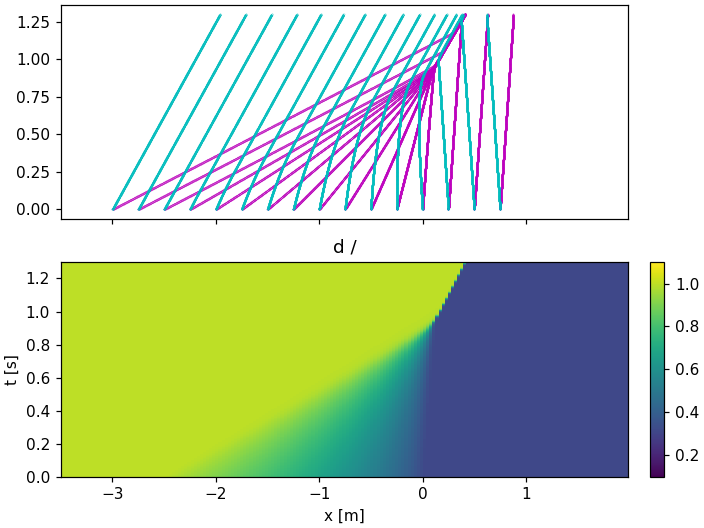

<ipython-input-18-fcca6afba870>:33: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax[1].pcolormesh(x[::3], t[::3], np.sqrt(C[::3,::3]), rasterized=True, vmin=0.1, vmax=1.1)


Text(0.5, 1.0, 'd /')

In [18]:
fig, ax = plt.subplots(2, 1, constrained_layout=True, sharex=True)

#pc = ax[0].pcolormesh(x[::3], t[::3], U[::3,::3], rasterized=True, vmin=0.0, vmax=2)
#ax[0].set_ylabel('t [s]')
#ax[0].set_title('u [m/s]')
#fig.colorbar(pc, ax=ax[0])

# plot some characteristics...
xx = np.arange(-3, 1, 0.25)
for i in range(len(t)):
    ax[0].plot(xx, t[i] + 0 * xx, 'm.', ms=0.2)
    u = np.interp(xx, x, U[i,:])
    c = np.interp(xx, x, C[i,:])
    xx = xx + dt * (u + c)

xx = np.arange(-3, 1, 0.25)
for i in range(len(t)):
    ax[0].plot(xx, t[i] + 0 * xx, 'c.', ms=0.2)
    u = np.interp(xx, x, U[i,:])
    c = np.interp(xx, x, C[i,:])
    xx = xx + dt * (u - c)

# plot the theoretical curves...
xx = np.arange(-3, 1, 0.5)
c = np.interp(xx, x, C[0,:])
#print(c)
for nn, x0 in enumerate(xx):
    
    slope = (3 * c[nn] - 2 * C[0, -2])
    print(slope, c[-1])
    ax[0].plot(t  * slope + x0 , t, 'k')
    
pc = ax[1].pcolormesh(x[::3], t[::3], np.sqrt(C[::3,::3]), rasterized=True, vmin=0.1, vmax=1.1)
ax[1].set_ylabel('t [s]')
ax[1].set_xlabel('x [m]')
fig.colorbar(pc, ax=ax[1])
ax[1].set_title('d /')